###데이터 불러오기

In [1]:
# 의사결정 나무 할 때 그림 볼 수 있게 하려고 하는 라이브러리
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns           
import matplotlib.pyplot as plt

data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/BigMining/4차년도3.xlsx", index_col='학생ID') #id는 인덱스로 쓴다는 걸 설정

print(data.columns) 
display(data.info())     
display(data.head()) 

Index(['대학변경여부', '성별', '19년12월소속', '대학유형', '대학소재지', '수시정시', '영향준사람', '대학선택요인',
       '대학학과우선순위', '학적1', '이수학점1', '평점평균1', '장학금1', '학자금대출1', '학적상태2', '이수학점2',
       '평점평균2', '장학금2', '학자금대출2', '계절학기', '교직과정', '복수전공', '교우관계', '학교자부심',
       '전공혼자공부', '전공같이공부', '학과만족도', '대학만족도', '진로취창업서비스', '대입준비', '외국어공부',
       '전문자격시험', '능력향상취업취미공부', '해외연수', '자격증취득', '알바제외구직활동', '현재일자리', '독립여부',
       '아버지근로', '어머니근로', '독서여부', '동아리', '해외여행', '미래직업', '잘하는거', '좋아하는거', '군입대',
       '건강도', '흡연', '음주', '행복도', '삶만족도'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 111012205 to 293415506
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대학변경여부      4826 non-null   int64  
 1   성별          4826 non-null   int64  
 2   19년12월소속    4826 non-null   int64  
 3   대학유형        4826 non-null   int64  
 4   대학소재지       4826 non-null   int64  
 5   수시정시        4826 non-null   int64  
 6   영향준사람       4826 n

None

,대학변경여부,성별,19년12월소속,대학유형,대학소재지,수시정시,영향준사람,대학선택요인,대학학과우선순위,학적1,...,해외여행,미래직업,잘하는거,좋아하는거,군입대,건강도,흡연,음주,행복도,삶만족도
학생ID,,,,,,,,,,,,,,,,,,,,,
111012205,0,0,4,1,1,1,1,4,3,1,...,1,1,2,3,0,4,2,1,1,2
111027205,0,0,4,1,2,2,1,2,2,1,...,0,0,2,3,0,3,2,2,4,2
112041401,0,0,9,4,1,1,1,2,2,0,...,1,0,4,4,0,5,1,1,9,8
111017201,0,0,8,4,1,1,2,4,3,1,...,1,0,2,2,0,2,2,1,4,3
112040103,0,1,5,1,1,2,3,3,2,1,...,1,1,4,4,1,5,2,1,8,9


0    4725
1     101
Name: 대학변경여부, dtype: int64


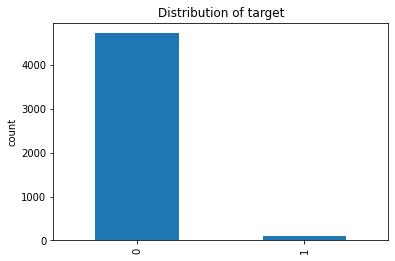

In [4]:
print(data['대학변경여부'].value_counts())

data['대학변경여부'].value_counts().plot.bar() 
plt.ylabel('count')
plt.title('Distribution of target')
plt.show()  #대략 2%

###의사결정나무

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:]  # 51개 변수 
y = data.iloc[:, 0]   # target 변수 대학변경여부 <- iloc은 인덱스를 지정해주어야함

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train))) #tree.score를 통해 predict까지 해줌
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.948


In [31]:
#depth 제한
tree1 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree1.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree1.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree1.score(X_test, y_test)))

학습용 데이터 정확도: 0.980
시험용 데이터 정확도: 0.977


In [32]:
#random_state 함께 제한
tree2 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree2.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree2.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree2.score(X_test, y_test)))

학습용 데이터 정확도: 0.983
시험용 데이터 정확도: 0.972


####의사결정나무 그리드서치

In [33]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': [3,4,5,6,7],
              'min_samples_split': [3, 5],
              'splitter': ['best', 'random'], 'random_state':[42]}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,random_state,splitter,mean_test_score
1,3,3,42,random,0.978094
3,3,5,42,random,0.977798
0,3,3,42,best,0.977503
2,3,5,42,best,0.977207
5,4,3,42,random,0.977205
7,4,5,42,random,0.977205
4,4,3,42,best,0.976910
6,4,5,42,best,0.976319
9,5,3,42,random,0.976023
15,6,5,42,random,0.975726


In [34]:
#그리드 서치 결과
tree3 = DecisionTreeClassifier(max_depth=3, min_samples_split=3, splitter="random", random_state=42)
tree3.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree3.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree3.score(X_test, y_test)))

학습용 데이터 정확도: 0.979
시험용 데이터 정확도: 0.980


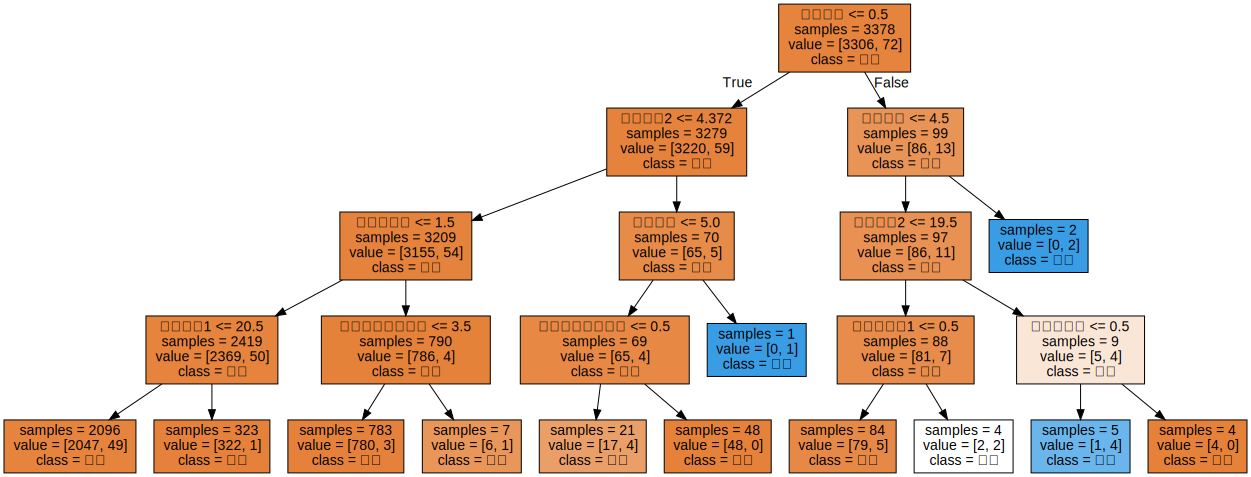

In [35]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree1, out_file="tree.dot", class_names=["유지", "이탈"],
                feature_names=data.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

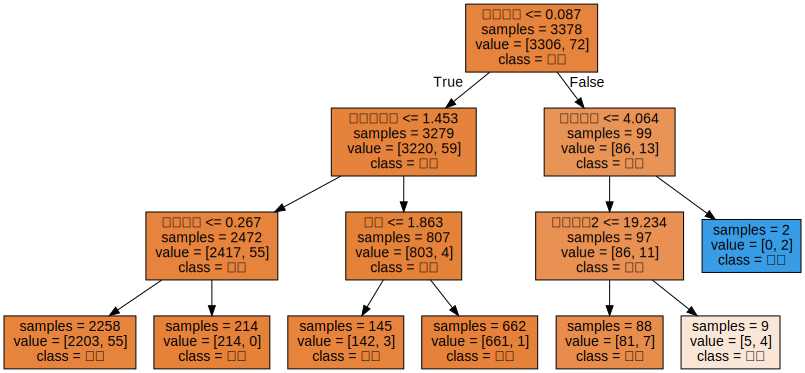

In [36]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree3, out_file="tree.dot", class_names=["유지", "이탈"],
                feature_names=data.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [37]:
result = tree3.feature_importances_ #어떤 변수가 가장 중요하게 쓰였는지, 중요도 점수를 알 수 있음. 전부 합치면 1이 됨
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.36646944 0.         0.         0.04328297
 0.         0.         0.         0.         0.         0.
 0.         0.         0.25865243 0.         0.         0.
 0.         0.02759209 0.         0.         0.         0.
 0.         0.         0.         0.         0.29359366 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0104094
 0.         0.         0.        ]


In [16]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [17]:
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

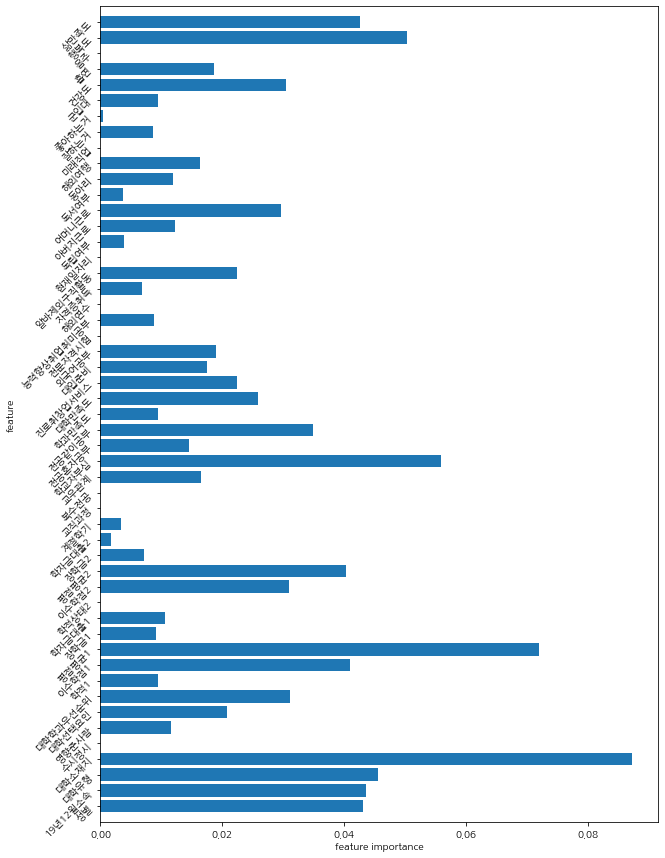

In [38]:
import numpy as np  

def plot_feature_importances_data(model):   #함수를 만듦 
    plt.rcParams["figure.figsize"] = (10,15)
    n_features = len(data.columns[1:]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') #barh는 가로형 
    plt.yticks(np.arange(n_features), data.columns[1:],rotation=45)   # 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정:data의 변수 이름 보여줘
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_data(tree)

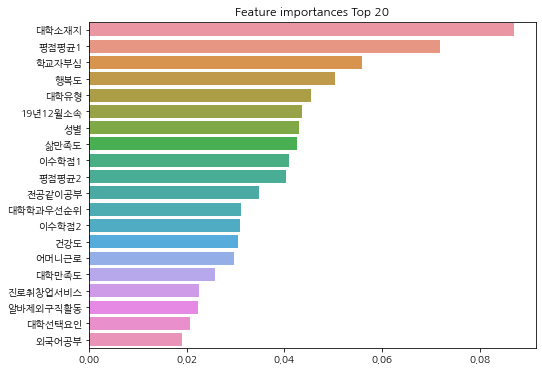

In [39]:
import seaborn as sns

ftr_importances_values=tree.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

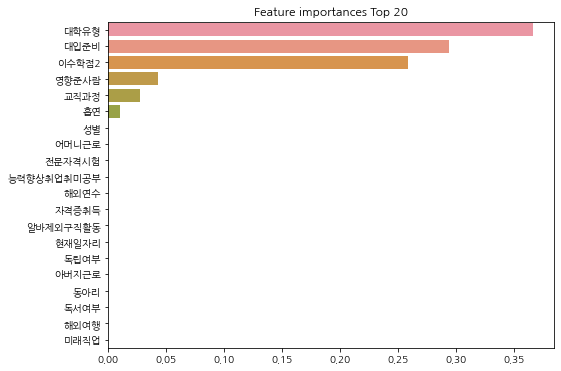

In [40]:
import seaborn as sns

ftr_importances_values=tree3.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

###랜덤 포레스트

In [26]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.980


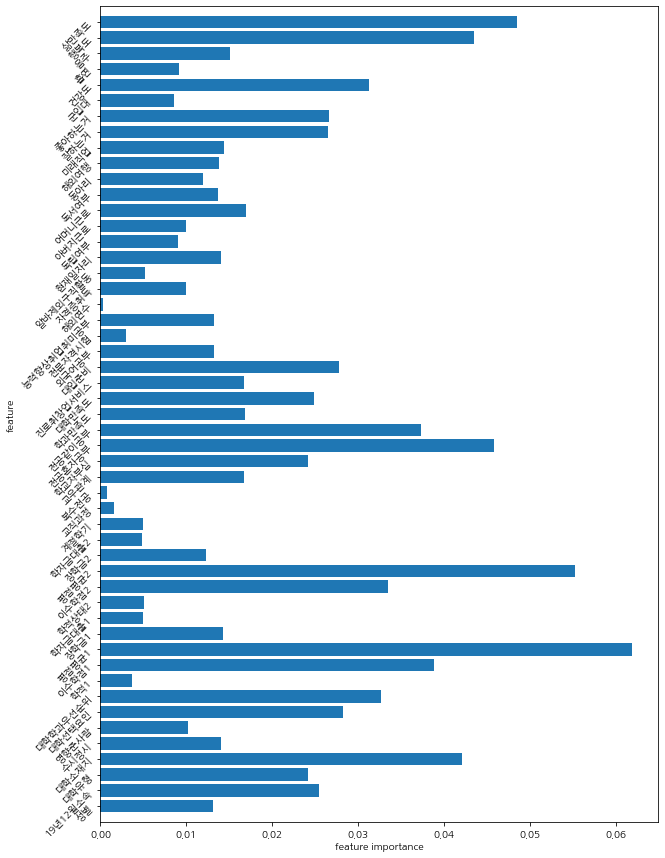

In [27]:
plot_feature_importances_data(forest)

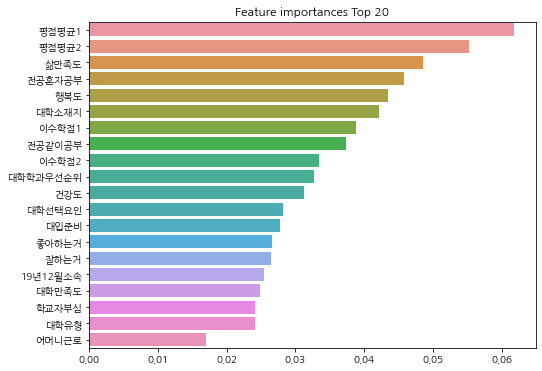

In [28]:
ftr_importances_values=forest.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [29]:
#max_depth 제한

forest1 = RandomForestClassifier(n_estimators=100,max_depth=8, random_state=42)
forest1.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest1.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest1.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.980
시험용 데이터 세트 정확도: 0.980


####랜덤 포레스트 그리드서치

In [71]:
parameters = {'max_features': [3,4,5,6,7],
              'n_estimators': [10, 50, 100],
              'random_state':[42]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(init_rf, param_grid=parameters, cv=3, refit=True)
print(grid_rf)
# 파라미터들을 순차적으로 학습, 검증
grid_rf.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_rf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 50, 100], 'random_state': [42]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_features': 3, 'n_estimators': 10, 'rando...",0.978686,2,0.978686,0.978686,0.978686
1,"{'max_features': 3, 'n_estimators': 50, 'rando...",0.978686,2,0.978686,0.978686,0.978686
2,"{'max_features': 3, 'n_estimators': 100, 'rand...",0.978686,2,0.978686,0.978686,0.978686
3,"{'max_features': 4, 'n_estimators': 10, 'rando...",0.978686,2,0.978686,0.978686,0.978686
4,"{'max_features': 4, 'n_estimators': 50, 'rando...",0.978686,2,0.978686,0.978686,0.978686
5,"{'max_features': 4, 'n_estimators': 100, 'rand...",0.978686,2,0.978686,0.978686,0.978686
6,"{'max_features': 5, 'n_estimators': 10, 'rando...",0.978686,2,0.978686,0.978686,0.978686
7,"{'max_features': 5, 'n_estimators': 50, 'rando...",0.978686,2,0.978686,0.978686,0.978686
8,"{'max_features': 5, 'n_estimators': 100, 'rand...",0.978686,2,0.978686,0.978686,0.978686
9,"{'max_features': 6, 'n_estimators': 10, 'rando...",0.978686,2,0.978686,0.978686,0.978686


In [73]:
#그리드 서치 결과
forest2 = RandomForestClassifier(n_estimators=10,max_features=3, random_state=42)
forest2.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(forest2.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(forest2.score(X_test, y_test)))

학습용 데이터 정확도: 0.996
시험용 데이터 정확도: 0.979


######여기부터 다시

In [59]:
X = data.iloc[:, 1:]  
y = data.iloc[:, 0]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42,
                                  class_weight = "balanced", # 예측의 성능을 높이기 위해서는 불균형 처리 필요 
                                  n_estimators=200,
                                  max_depth=5)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)

In [62]:
# 모델 성능평가
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

print('[Train] Accuracy: %0.4f' % accuracy_score(y_train, train_preds))
print('[Test] Accuracy: %0.4f' % accuracy_score(y_test, test_preds))

print('[Train] Precision: %0.4f' % precision_score(y_train, train_preds, average='micro'))
print('[Test] Precision: %0.4f' % precision_score(y_test, test_preds, average='micro'))

print('[Train] Recall: %0.4f' % recall_score(y_train, train_preds, average='micro'))
print('[Test] Recall: %0.4f' % recall_score(y_test, test_preds, average='micro'))

[Train] Accuracy: 0.9544
[Test] Accuracy: 0.9427
[Train] Precision: 0.9544
[Test] Precision: 0.9427
[Train] Recall: 0.9544
[Test] Recall: 0.9427


In [ ]:
model1 = RandomForestClassifier(random_state = 42, max_features = 3,
                               n_estimators = 10)

model1.fit(x_train, y_train)

###GBM

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.988
시험용 데이터 세트 정확도: 0.977


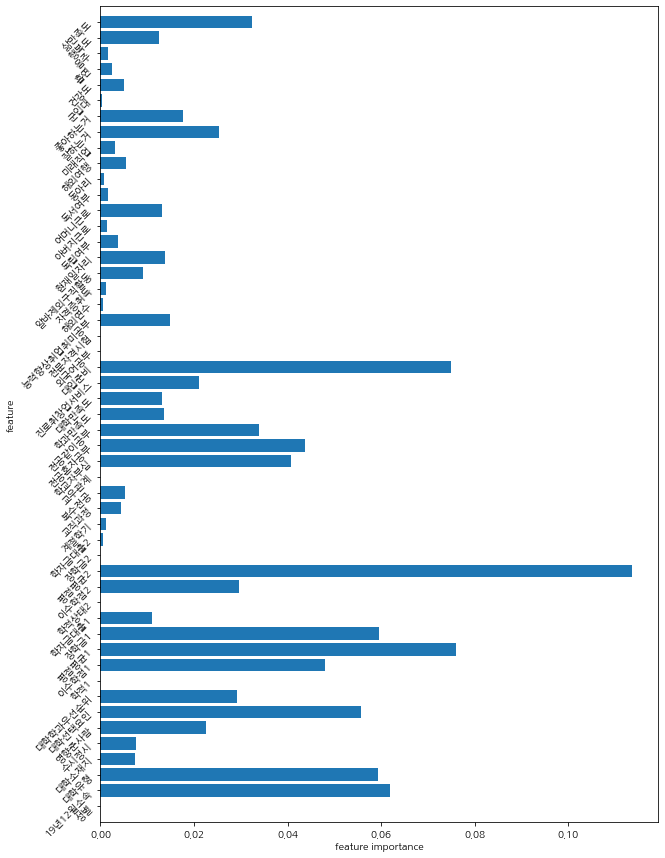

In [44]:
plot_feature_importances_data(gbrt)

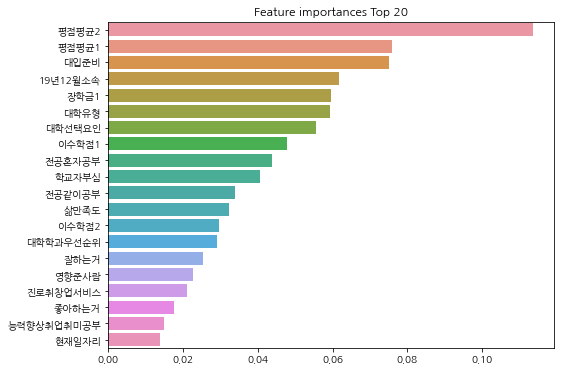

In [43]:
ftr_importances_values=gbrt.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [45]:
#나무 깊이 제한
gbrt1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt1.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt1.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.979
시험용 데이터 세트 정확도: 0.980


In [46]:
#학습률 감소
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt2.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.979
시험용 데이터 세트 정확도: 0.980


####GBM 그리드서치

In [75]:
parameters = {'max_features': [3,4,5,6,7],'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02], 'random_state':[42]}

# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_features': [3, 4, 5, 6, 7],
                         'random_state': [42]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_features': 3, 'ran...",0.977798,25,0.976909,0.977798,0.978686
1,"{'learning_rate': 0.1, 'max_features': 4, 'ran...",0.978390,20,0.978686,0.978686,0.977798
2,"{'learning_rate': 0.1, 'max_features': 5, 'ran...",0.978390,20,0.977798,0.978686,0.978686
3,"{'learning_rate': 0.1, 'max_features': 6, 'ran...",0.978094,24,0.977798,0.977798,0.978686
4,"{'learning_rate': 0.1, 'max_features': 7, 'ran...",0.978686,8,0.977798,0.979574,0.978686
5,"{'learning_rate': 0.08, 'max_features': 3, 'ra...",0.978390,20,0.977798,0.978686,0.978686
6,"{'learning_rate': 0.08, 'max_features': 4, 'ra...",0.978686,8,0.978686,0.978686,0.978686
7,"{'learning_rate': 0.08, 'max_features': 5, 'ra...",0.978686,8,0.977798,0.979574,0.978686
8,"{'learning_rate': 0.08, 'max_features': 6, 'ra...",0.978982,1,0.978686,0.979574,0.978686
9,"{'learning_rate': 0.08, 'max_features': 7, 'ra...",0.978390,20,0.977798,0.978686,0.978686


In [76]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류

gbrt3 = GradientBoostingClassifier(max_features=3, learning_rate=0.1, random_state=42)
gbrt3.fit(X_train, y_train)
print("학습 데이터 세트 정확도: {:.3f}".format(gbrt3.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt3.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.980
시험용 데이터 세트 정확도: 0.980


###평가

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
dt_train_preds = tree3.predict(X_train)
dt_test_preds = tree3.predict(X_test)

print('[Train] Accuracy: %0.4f' % accuracy_score(y_train, dt_train_preds))
print('[Test] Accuracy: %0.4f' % accuracy_score(y_test, dt_test_preds))

print('[Train] Precision: %0.4f' % precision_score(y_train, dt_train_preds, average='micro'))
print('[Test] Precision: %0.4f' % precision_score(y_test, dt_test_preds, average='micro'))

print('[Train] Recall: %0.4f' % recall_score(y_train, dt_train_preds, average='micro'))
print('[Test] Recall: %0.4f' % recall_score(y_test, dt_test_preds, average='micro'))

[Train] Accuracy: 0.9793
[Test] Accuracy: 0.9800
[Train] Precision: 0.9793
[Test] Precision: 0.9800
[Train] Recall: 0.9793
[Test] Recall: 0.9800


In [80]:
# 모델 성능평가

rf_train_preds = forest2.predict(X_train)
rf_test_preds = forest2.predict(X_test)

print('[Train] Accuracy: %0.4f' % accuracy_score(y_train, rf_train_preds))
print('[Test] Accuracy: %0.4f' % accuracy_score(y_test, rf_test_preds))

print('[Train] Precision: %0.4f' % precision_score(y_train, rf_train_preds, average='micro'))
print('[Test] Precision: %0.4f' % precision_score(y_test, rf_test_preds, average='micro'))

print('[Train] Recall: %0.4f' % recall_score(y_train, rf_train_preds, average='micro'))
print('[Test] Recall: %0.4f' % recall_score(y_test, rf_test_preds, average='micro'))

[Train] Accuracy: 0.9964
[Test] Accuracy: 0.9793
[Train] Precision: 0.9964
[Test] Precision: 0.9793
[Train] Recall: 0.9964
[Test] Recall: 0.9793


In [81]:
# 모델 성능평가

gbrt_train_preds = gbrt3.predict(X_train)
gbrt_test_preds = gbrt3.predict(X_test)

print('[Train] Accuracy: %0.4f' % accuracy_score(y_train, gbrt_train_preds))
print('[Test] Accuracy: %0.4f' % accuracy_score(y_test, gbrt_test_preds))

print('[Train] Precision: %0.4f' % precision_score(y_train, gbrt_train_preds, average='micro'))
print('[Test] Precision: %0.4f' % precision_score(y_test, gbrt_test_preds, average='micro'))

print('[Train] Recall: %0.4f' % recall_score(y_train, gbrt_train_preds, average='micro'))
print('[Test] Recall: %0.4f' % recall_score(y_test, gbrt_test_preds, average='micro'))

[Train] Accuracy: 0.9802
[Test] Accuracy: 0.9800
[Train] Precision: 0.9802
[Test] Precision: 0.9800
[Train] Recall: 0.9802
[Test] Recall: 0.9800


In [83]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_test_preds, target_names=["유지", "이탈"]))
print("Random Forest:")
print(classification_report(y_test, rf_test_preds, target_names=["유지", "이탈"]))
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_test_preds, target_names=["유지", "이탈"]))

Decision Tree:
              precision    recall  f1-score   support

          유지       0.98      1.00      0.99      1419
          이탈       0.00      0.00      0.00        29

    accuracy                           0.98      1448
   macro avg       0.49      0.50      0.49      1448
weighted avg       0.96      0.98      0.97      1448

Random Forest:
              precision    recall  f1-score   support

          유지       0.98      1.00      0.99      1419
          이탈       0.00      0.00      0.00        29

    accuracy                           0.98      1448
   macro avg       0.49      0.50      0.49      1448
weighted avg       0.96      0.98      0.97      1448

Gradient Boosting:
              precision    recall  f1-score   support

          유지       0.98      1.00      0.99      1419
          이탈       0.00      0.00      0.00        29

    accuracy                           0.98      1448
   macro avg       0.49      0.50      0.49      1448
weighted avg       0.96  

In [77]:
#가장 성능이 좋았던 tree1, forest3, gbrt1 기준으로

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree3.predict(X_test)
rf_pred = forest2.predict(X_test)
gbrt_pred = gbrt3.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

0    1419
1      29
Name: 대학변경여부, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.980
[[1419    0]
 [  29    0]]
Random forest 시험용 데이터 세트 정확도:0.979
[[1418    1]
 [  29    0]]
Gradient boosting 시험용 데이터 세트 정확도:0.980
[[1419    0]
 [  29    0]]


In [ ]:
# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred_over, target_names=["유지", "이탈"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred_over, target_names=["유지", "이탈"]))
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_pred_over, target_names=["유지", "이탈"]))

###SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0)
X_train_over, y_train_over = smt.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (3378, 51) (3378,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (6612, 51) (6612,)
SMOTE 적용 후 레이블 값 분포: 
 0    3306
1    3306
Name: 대학변경여부, dtype: int64


In [91]:
#의사결정나무
tree11 = DecisionTreeClassifier(max_depth=3, min_samples_split=3, splitter="random", random_state=42)
tree11.fit(X_train_over, y_train_over)

print("학습용 데이터 정확도: {:.3f}".format(tree11.score(X_train_over, y_train_over)))
print("시험용 데이터 정확도: {:.3f}".format(tree11.score(X_test, y_test)))

학습용 데이터 정확도: 0.752
시험용 데이터 정확도: 0.641


In [92]:
#랜덤포레스트

forest11 = RandomForestClassifier(n_estimators=10,max_features=3, random_state=42)
forest11.fit(X_train_over, y_train_over)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest11.score(X_train_over, y_train_over)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest11.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.976


In [93]:
#GBM

gbrt11 = GradientBoostingClassifier(max_features=3,random_state=42, learning_rate=0.1)
gbrt11.fit(X_train_over, y_train_over)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt11.score(X_train_over, y_train_over)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt11.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.949
시험용 데이터 세트 정확도: 0.906


In [94]:
dt_pred_over = tree11.predict(X_test)
rf_pred_over = forest11.predict(X_test)
gbrt_pred_over = gbrt11.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred_over)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred_over)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred_over)))
print(confusion_matrix(y_test, gbrt_pred))

Decision tree 시험용 데이터 세트 정확도:0.641
[[1419    0]
 [  29    0]]
Random forest 시험용 데이터 세트 정확도:0.976
[[1418    1]
 [  29    0]]
Gradient boosting 시험용 데이터 세트 정확도:0.906
[[1419    0]
 [  29    0]]


In [95]:
# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred_over, target_names=["유지", "이탈"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred_over, target_names=["유지", "이탈"]))
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_pred_over, target_names=["유지", "이탈"]))

Decision Tree:
              precision    recall  f1-score   support

          유지       0.99      0.64      0.78      1419
          이탈       0.03      0.62      0.06        29

    accuracy                           0.64      1448
   macro avg       0.51      0.63      0.42      1448
weighted avg       0.97      0.64      0.76      1448

Random Forest:
              precision    recall  f1-score   support

          유지       0.98      0.99      0.99      1419
          이탈       0.20      0.07      0.10        29

    accuracy                           0.98      1448
   macro avg       0.59      0.53      0.55      1448
weighted avg       0.97      0.98      0.97      1448

Gradient Boosting:
              precision    recall  f1-score   support

          유지       0.98      0.92      0.95      1419
          이탈       0.04      0.17      0.07        29

    accuracy                           0.91      1448
   macro avg       0.51      0.55      0.51      1448
weighted avg       0.96  